We will look at iris dataset and try to represent the sample points as nodes and similarities (defined using Euclidean distance) between the points as edges. By doing this, we will look at various topological properties of graphs and how they help us to analyze and understand the data using some of Python packages including networkx which is useful for analyzing networks. 

I referred to the book "Data mining and analysis: fundamental concepts and algorithms" by Zaki, Mohammed J. and Wagner Meira Jr.


In [1]:
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import collections

### Lod the data

In [2]:
iris = datasets.load_iris()
pd.DataFrame(iris.data, columns=iris.feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

### Construction of similarity matrix

In [4]:
sim=np.zeros((150,150))
irisdata=iris.data.reshape((150,-1,4))
k=0
for i in range(150):
    for j in range(150):
        sim[i,j]=pairwise_distances(irisdata[i],irisdata[j])**2

### Mean and standard deviation of similarity matrix

In [5]:
np.mean(np.exp(-sim)),np.std(np.exp(-sim))

(0.19688199004427256, 0.2904499269828914)

### Choosing a distance threshold 
(2 standard deviations from the mean)

In [6]:
thresh = np.mean(np.exp(-sim))+2*np.std(np.exp(-sim))

### Adjacency matrix

In [7]:
adj_mat=(np.exp(-sim)>=thresh).astype(int)
adj_mat

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

### Construction of graph using adjacency matrix

In [8]:
rows, cols = np.where(adj_mat == 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
gr.add_edges_from(edges)

Text(0.5, 1.0, 'Iris graph based on the distance threshold')

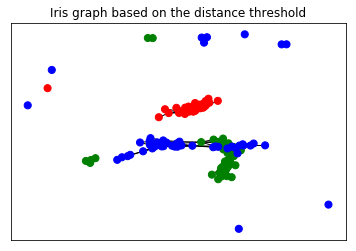

In [9]:
node_colors=dict(zip(list(range(150)),['r']*50+['g']*50+['b']*50))
pos = nx.spring_layout(gr)
nx.draw_networkx(gr,pos, with_labels=False,node_size=50,
                 node_color=[node_colors[i] for i in gr.nodes])
plt.title('Iris graph based on the distance threshold')

Text(0.5, 1.0, 'Iris graph (shell layout)')

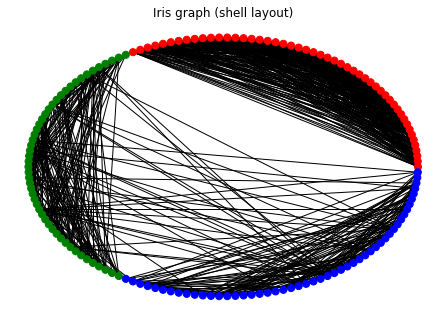

In [10]:
pos = nx.shell_layout(gr)
nx.draw(gr,pos,node_size=50,
       node_color=[node_colors[i] for i in gr.nodes])
plt.title('Iris graph (shell layout)')

### Subgraphs

In [11]:
subg = list(map(list,list(nx.connected_components(gr))))
print('Number of nodes in subgraphs:',[len(i) for i in subg])
print('Small subgraphs:',[subg[1]]+subg[3:])

Number of nodes in subgraphs: [49, 1, 84, 4, 2, 3, 1, 1, 1, 2, 1, 1]
Small subgraphs: [[41], [57, 98, 60, 93], [68, 87], [105, 122, 118], [106], [108], [109], [131, 117], [134], [135]]


### Visualizing small subgraphs

<Figure size 1440x2880 with 0 Axes>

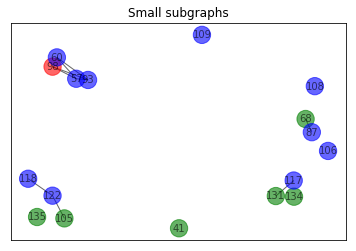

<Figure size 1440x2880 with 0 Axes>

In [12]:
smallsubnodes = [j for i in [subg[1]]+subg[3:] for j in i]
nx.draw_networkx(gr.subgraph(smallsubnodes),
                 pos=nx.spring_layout(gr,k=0.3,weight='length',iterations=50,scale=2),alpha=0.6,
                 node_size=300,font_size=10, node_color=[node_colors[i] for i in smallsubnodes])
plt.title('Small subgraphs')
plt.figure(figsize=(20,40))

### Degree distribution

Text(0.5, 1.0, 'Degree distribution of the entire iris graph')

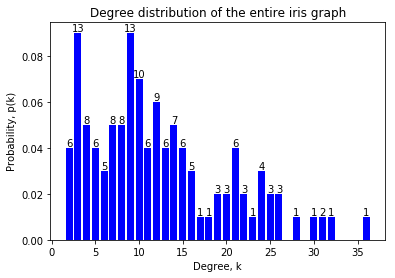

In [13]:
degree_sequence = sorted([d for n, d in gr.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cntf=list(map(lambda x:round(x/150,2),cnt))
fig, ax = plt.subplots()
[ax.text(i,f,v,horizontalalignment='center',verticalalignment='bottom') 
 for i, v, f in zip(deg,cnt, cntf)]
plt.xlabel('Degree, k')
plt.ylabel('Probability, p(k)')
plt.bar(deg, cntf, width=0.80, color='b')
plt.title('Degree distribution of the entire iris graph')

### Node with the highest degree

Text(0.5, 1.0, 'Node 7 has the highest degree')

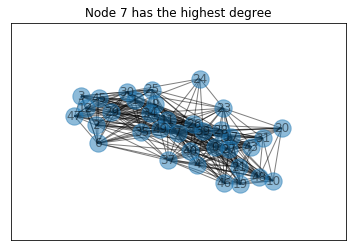

In [14]:
nod,deg=sorted(gr.degree, key=lambda x: x[1], reverse=True)[0]
nx.draw_networkx(gr.subgraph(list(np.where(adj_mat[7])[0])),pos=nx.spring_layout(gr),alpha=0.5,k=1)
plt.title('Node {} has the highest degree'.format(nod))

### Path lengths of connected subgraphs 
#### First subgraph (with only setosa and virginica samples)

In [15]:
plen=np.zeros((150,150))
for i in subg[0]:
    for j in subg[0]:
        plen[i,j] = nx.shortest_path_length(gr,i,j)
d=collections.Counter(plen.reshape(-1,))
d.pop(0)
d={i:j/2 for i,j in d.items()}
deg, cnt = zip(*d.items())
print('Percentage of nodes covered with hops:',dict(zip(deg,np.cumsum(cnt)/np.sum(cnt)*100)))

Percentage of nodes covered with hops: {1.0: 35.2891156462585, 2.0: 74.48979591836735, 3.0: 91.58163265306123, 4.0: 97.53401360544217, 5.0: 99.57482993197279, 6.0: 100.0}


Text(0.5, 1.0, 'Path length histogram of a connected subgraph \n (with only setosa and virginica samples)\n with average path length:2.02')

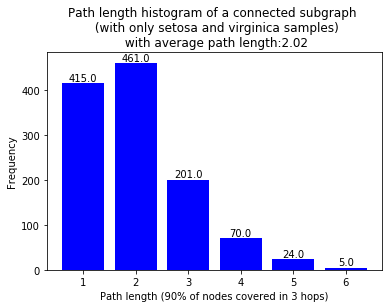

In [16]:
fig, ax = plt.subplots()
[ax.text(i,v,v,horizontalalignment='center',verticalalignment='bottom') 
 for i, v in zip(deg,cnt)]
plt.bar(deg, cnt, width=0.80, color='b')
plt.xlabel('Path length (90% of nodes covered in 3 hops)')
plt.ylabel('Frequency')
plt.title('Path length histogram of a connected subgraph \n (with only setosa and virginica samples)\n with average path length:{}'
         .format(round(sum([i*j/sum(d.values()) for i,j in d.items()]),2)))

#### Second subgraph (with only versicolor samples which are well-separated from remaining two flower types)

In [17]:
plen=np.zeros((150,150))
for i in subg[2]:
    for j in subg[2]:
        plen[i,j] = nx.shortest_path_length(gr,i,j)
d=collections.Counter(plen.reshape(-1,))
d.pop(0)
d={i:j/2 for i,j in d.items()}
deg, cnt = zip(*d.items())
print('Percentage of nodes covered with hops:',dict(zip(deg,np.cumsum(cnt)/np.sum(cnt)*100)))

Percentage of nodes covered with hops: {1.0: 9.409064830751577, 2.0: 26.247848537005165, 3.0: 44.23407917383821, 4.0: 61.35972461273666, 5.0: 75.81755593803786, 6.0: 85.14056224899599, 7.0: 92.02524383247275, 8.0: 96.21342512908778, 9.0: 98.79518072289156, 10.0: 99.65576592082617, 11.0: 100.0}


Text(0.5, 1.0, 'Path length histogram of a connected subgraph \n (with only versicolor samples)\n with average path length:4.11')

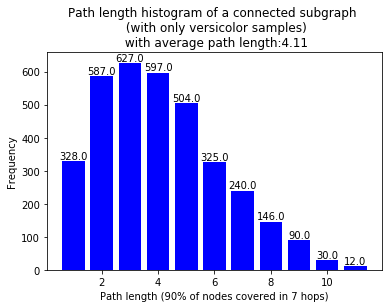

In [18]:
deg, cnt = zip(*d.items())
fig, ax = plt.subplots()
[ax.text(i,v,v,horizontalalignment='center',verticalalignment='bottom') 
 for i, v in zip(deg,cnt)]
plt.bar(deg, cnt, width=0.80, color='b')
plt.xlabel('Path length (90% of nodes covered in 7 hops)')
plt.ylabel('Frequency')
plt.title('Path length histogram of a connected subgraph \n (with only versicolor samples)\n with average path length:{}'
         .format(round(sum([i*j/sum(d.values()) for i,j in d.items()]),2)))

### Clustering coefficient

Text(0.5, 1.0, 'Clustering coefficient of nodes')

<Figure size 720x432 with 0 Axes>

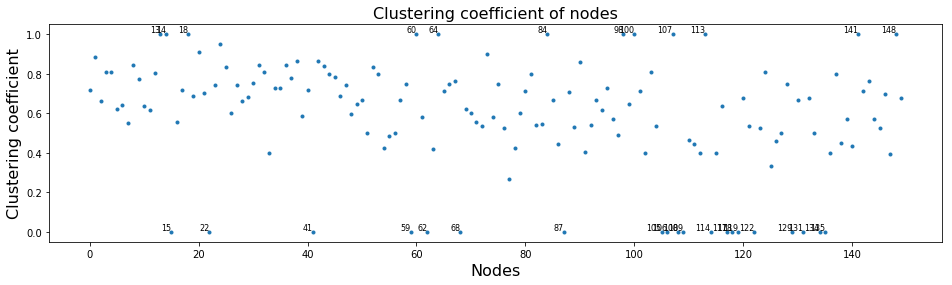

In [19]:
d=nx.clustering(gr)
deg, cnt = zip(*d.items())
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(figsize=(16,4))
# plt.bar(deg, cnt, width=0.80, color='b')
[ax.text(i,v,i,horizontalalignment='right',
         verticalalignment='bottom',fontsize=8) 
 for i, v in zip(deg,cnt) if v==1 or v==0]
plt.plot(deg,cnt,'.')
plt.xlabel('Nodes',fontsize=16)
plt.ylabel('Clustering coefficient',fontsize=16)
plt.title('Clustering coefficient of nodes',fontsize=16)

### Some nodes with triangles

Text(0.5, 1.0, 'Some nodes (18, 60, 64, 141) with clustering coefficient 1 \n they form triangles with all of their neighbor nodes')

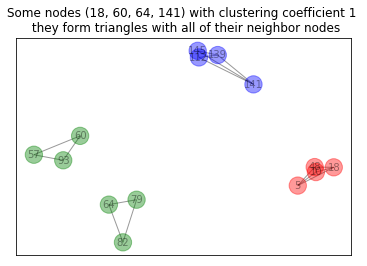

In [20]:
num_of_triangles = 13
tr_list=list(set([j for i in [t for t in nx.cycle_basis(gr) if len(t)==3 
                              and 60 in t or 64 in t 
                              or 18 in t or 141 in t][:num_of_triangles] for j in i]))
nx.draw_networkx(gr.subgraph(tr_list),
                 pos=nx.spring_layout(gr,k=0.3,weight='length',iterations=50,scale=2),alpha=0.4,
                 node_size=300,font_size=10, 
                 node_color=[node_colors[i] for i in tr_list])
plt.title('Some nodes (18, 60, 64, 141) with clustering coefficient 1 \n they form triangles with all of their neighbor nodes')

### Some nodes without triangles

In [21]:
gr.edges([15,62])

EdgeDataView([(15, 33), (15, 15), (62, 92), (62, 62)])

Text(0.5, 1.0, 'Some nodes (15, 62) with clustering coefficient 0 \n they do not form triangles with their neighbor nodes')

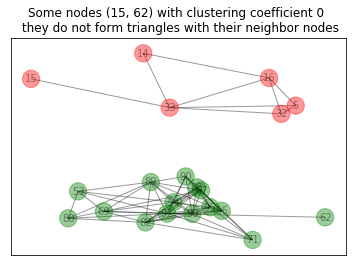

In [22]:
no_tr_list=list(set([j for i in gr.edges([33,92]) for j in i]))
nx.draw_networkx(gr.subgraph(no_tr_list),
                 pos=nx.spring_layout(gr,k=0.3,weight='length',iterations=50,scale=2),alpha=0.4,
                 node_size=300,font_size=10, 
                 node_color=[node_colors[i] for i in no_tr_list])
plt.title('Some nodes (15, 62) with clustering coefficient 0 \n they do not form triangles with their neighbor nodes')